#  CMPE295 - Masters Project
## Abhishek Bais, Haley Feng, Princy Joy, Shannon Phu
## A Reinforcement-based Question-Answer Recommender System (RQAR)
## Team Equality

# Data Narrative
Community-based Question Answering (CBQA) platforms such as Reddit, Slack and Quora provide registered users a dedicated medium to post questions, crowdsource answers, find shared interest groups, and learn from each other. 

The goal of this project is to help CBQA platform users find answers to their questions.The RQAR oulined below is tailor made for the Reddit platform but designed in a modular fashion making it easily extendible to other CBQA platforms..

Reddit organizes its content into topic-based communities called “subreddits”. Users can find relevant communities using tools such as “r/FindAReddit” and join them to post questions and get community help on finding which subreddit to post to. However, with over 2,620,000 subreddits and an average of 60,251 new subreddits added to Reddit each month, finding the right community to join has become increasingly challenging.

To address this problem, a Reinforcement-based Question-Answer Recommender System (RQAR) is proposed to help CBQA users find relevant communities for their questions. This system will be used to extract context, group previously answered questions by similarity, learn from user interactions to find, rank, and recommend relevant communities to users.


# Factors
1. Sentiment Similarity of posted question to historically answered questions
2. Semantic Similarity of posted question to historically answered questions

# 1.0. Read in datasets

## 1.1. Import packages to read-in data, visualize, model and evaluate

In [2]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import requests

# Import NLP libraries
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

# Import data preprocessing libs
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Import Sentiment Analysis packages
import warnings
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Import time libs
import time
import os

# Import modelling libs
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from scipy import spatial

# google auth
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from sklearn.preprocessing import scale
import warnings

# Pickle and save model
import pickle

%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=False)

Mounted at /content/drive


In [4]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## 1.2. Read in historical question answer pairs

Text preprocessing is performed in the [data cleaning notebook](https://colab.research.google.com/drive/1OMpBFrYMt_Sy-d9jTdwn1lJ-5QdE9H7a?usp=sharing)

Tasks include:
1. Removing number, punctuations, stop words, repeats
2. Lemmatization and stemming
3. Extracting suggested subreddits from comments
4. Saving only one top voted subreddit for each question
5. Splitting dataset into training (80%) and testing (20%)

### Training Dataset

In [5]:
path = '/content/drive/Shareddrives/CMPE295-TeamEquality/RQAR Code/2. Data Cleaning/data/train_QA_with_topic.csv'
df_QA = pd.read_csv(path)
df_QA = df_QA.drop(columns=['question_id','question','comment_id'])
df_QA

,question_vocab,comment_upvotes,suggested_subreddits,LDA_topic,LDA_topic_score
0,noth forc bot watch hilari amp brighten day wo...,2,r/subsimulatorgpt2meta,18,0.546713
1,suggest video game,3,r/pcgaming,12,0.222886
2,rpg actual play websit suggest also welcom,2,r/roleplayingforreddit,18,0.114961
3,post question usb flash drive,1,r/askelectronics,24,0.430540
4,good post text insan roommat freak told pay re...,2,r/badroommates,20,0.209685
...,...,...,...,...,...
33999,like aww post kid fan kid wan na see cute pet ...,3,r/eyebleach,12,0.153788
34000,opposit roastm one want genuin compliment brig...,4,r/toastme,22,0.247443
34001,peopl tri take trippi interest look pictur pos...,1,r/confusingperspective,24,0.109312
34002,find recommend ambient music track look find r...,1,r/musicmatch,23,0.488047


In [6]:
# Check for null value
df_QA.isnull().sum()

question_vocab          0
comment_upvotes         0
suggested_subreddits    0
LDA_topic               0
LDA_topic_score         0
dtype: int64

In [7]:
# Split into training and validation
from sklearn.model_selection import train_test_split
df_QA_train, df_QA_val = train_test_split(df_QA, test_size=0.2, random_state=0)
print("Training size:", len(df_QA_train))
print("Validation size:", len(df_QA_val))

Training size: 27203
Validation size: 6801


# 2.0. Exploratory Data Analysis



## 2.1 Question WordCloud

## 2.2 Topic Modeling

Refer to LDA topic modeling section in the [EDA notebook](https://colab.research.google.com/drive/1ylechsuBsTzGjqzWtO0YBhvMrSf04vqO?usp=sharing)

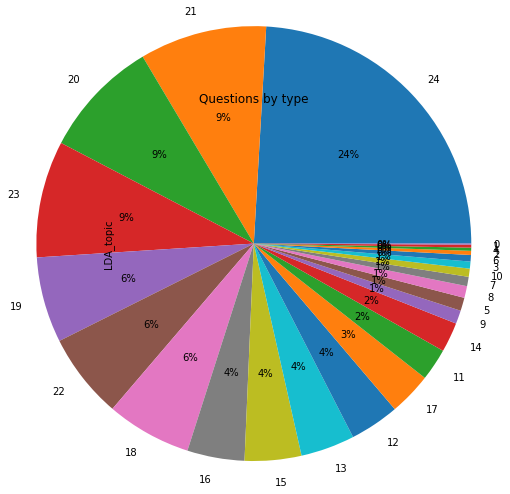

In [9]:
# Report historically answered questions by question topic
plt.figure(figsize=(15,5), edgecolor='b')
df_QA['LDA_topic'].value_counts().plot(kind="pie", radius=2.0, autopct='%1.0f%%')
plt.title('Questions by type')
plt.show()

## 2.3 Graph Representation

# 3.0. Model evaluation utilities

## 3.1. Plot classification metrics API

In [10]:
# Helper Function to plot classifier metrics
def plot_classifer_metrics(name, y_pred, y_test, X_test, accu_score, fpr, tpr, logit_roc_auc, classifer):
  fig, ax = plt.subplots(ncols=2, figsize=(8,5))
  
  # plot the roc/auc
  ax[0].plot(fpr, tpr, label='AUC: %0.2f' % logit_roc_auc)
  ax[0].plot([0, 1], [0, 1],'r--')
  ax[0].set_xlim([0.0, 1.0])
  ax[0].set_ylim([0.0, 1.05])
  ax[0].set_xlabel('False Positive Rate')
  ax[0].set_ylabel('True Positive Rate')
  ax[0].title.set_text(name)
  ax[0].legend(loc="lower right")

  # plot the confusion matrix
  plot_confusion_matrix(classifer, 
                          X_test, 
                          y_test, 
                          ax=ax[1], 
                          cmap='Blues',
                          display_labels=np.unique(y_test))
  ax[1].title.set_text(name)
  plt.tight_layout()

## 3.2. Print classification results API

In [11]:
# Helper function to print classification results
def show_classification_results(metrics):
  # print accuracy results
  metrics.sort_values(by='Accuracy', ascending=False, inplace=True)
  pd.pandas.set_option('display.max_columns', None)
  pd.set_option('display.expand_frame_repr', False)
  print(metrics[['Classifier', 'Accuracy', 'ROC_AUC']])
  print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(metrics.iloc[0]['Classifier'], metrics.iloc[0]['Accuracy']))

  # plot the roc/auc 
  #columns=['name', 'y_pred', 'y_test', 'X_test', 'accu_score', 'fpr', 'tpr', 'logit_roc_auc', 'clf']
  for i, r in metrics.iterrows():
    name   = r['Classifier']
    y_pred = r['y_pred']
    y_test = r['y_test']
    X_test = r['X_test']
    accu_score = r['Accuracy']
    fpr = r['fpr']
    tpr = r['tpr']
    logit_roc_auc = r['ROC_AUC']
    classifier = r['model']
    
    # Plot the confusion matrix
    plot_classifer_metrics(name, y_pred, y_test, X_test, accu_score, fpr, tpr, logit_roc_auc, classifier)

## 3.3. Muller loop API

In [13]:
# Update stop words
stop_words = set(stopwords.words('english'))
stop_words.add('http')
stop_words.add('https')
stop_words.add('com')

In [14]:
# Helper function to perform Muller Loop and evaluate different classifers
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(stop_words=stop_words, max_features=1000, ngram_range=(1, 3))
from sklearn.pipeline import Pipeline

def train_evaluate_classifiers(X, y):
    # list of classifiers to compare
    names = ["Nearest Neighbors", "Linear SVM", "Decision Tree", 
             "Random Forest", "Neural Net", "AdaBoost", "XGBoost"]
   
    classifiers = [Pipeline([('vectorizer', tvec),('classifier', KNeighborsClassifier(2))]),
                   Pipeline([('vectorizer', tvec),('classifier', SVC(kernel="linear", C=0.025, probability=True))]),
                   Pipeline([('vectorizer', tvec),('classifier', DecisionTreeClassifier(max_depth=5))]),
                   Pipeline([('vectorizer', tvec),('classifier', RandomForestClassifier(max_depth=5, n_estimators=10, max_features=2))]),
                   Pipeline([('vectorizer', tvec),('classifier', MLPClassifier(learning_rate='adaptive', early_stopping=True, max_iter=1000))]),
                   Pipeline([('vectorizer', tvec),('classifier', AdaBoostClassifier())]),
                   Pipeline([('vectorizer', tvec),('classifier', XGBClassifier())])
                   ]  
    # init
    accu_results = []
    predictions = []
    results = []
    
    max_score = 0.0
    max_class = ''

    # Train on class target label
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        start_time = time.time()
        clf.fit(X_train, y_train)
        score = 100.0 * clf.score(X_test, y_test)

        # find the best classifier
        if score > max_score:
            clf_best = clf
            max_score = score
            max_class = name

        # add classifier predictions and metric to predictions and results
        y_pred = clf.predict(X_test)
        y_pred_score = clf.predict_proba(X_test)[:,1]
        accu_score = 100.0 * accuracy_score(y_test, y_pred)

        logit_roc_auc = roc_auc_score(y_test, y_pred_score)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)

        # accumulate various scores
        f1 = 100.0 * f1_score(y_test, y_pred)
        precision = 100.0 * precision_score(y_test, y_pred)
        recall = 100.0 * recall_score(y_test, y_pred)

        # capture predictions, results in df
        predictions.append([name, y_pred, y_test, X_test, accu_score, fpr, tpr, logit_roc_auc, clf]) 
        accu_results.append([name, score, logit_roc_auc, f1, precision, recall, (time.time() - start_time)])
        results.append([name, y_pred, y_test, X_test, accu_score, fpr, tpr, logit_roc_auc, f1, precision, recall, clf])
        
    results = pd.DataFrame(results, columns=['Classifier', 'y_pred', 'y_test', 'X_test', 'Accuracy', 'fpr', 'tpr', 'ROC_AUC', 'F1', 'Precision', 'Recall', 'model'])
    return results

## 3.4. Pickle best model API

In [15]:
# Pickle
def pickle_best_model(model, pickle_filepath):
  with open(pickle_filepath, 'wb') as file:  
    pickle.dump(model, file)

## 3.5. Load, Evaluate best pickled model API

In [16]:
# Load, test pickled, best classification model
def evaluate_best_pickled_classifer(X1, y1, pickle_filepath, best_classifier):
  loaded_model = pickle.load(open(pickle_filepath, 'rb'))

  # Split data
  X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=.25)
  start_time = time.time()
  score = 100.0 * loaded_model.score(X_test, y_test)

  # Predict
  y_pred = loaded_model.predict(X_test)
  y_pred_score = loaded_model.predict_proba(X_test)[:,1]
  accu_score = 100.0 * accuracy_score(y_test, y_pred)

  logit_roc_auc = roc_auc_score(y_test, y_pred_score)
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)
  f1 = 100.0 * f1_score(y_test, y_pred)
  precision = 100.0 * precision_score(y_test, y_pred)
  recall = 100.0 * recall_score(y_test, y_pred)
 
  print('Best Classifier score= %s, Score (test, accuracy) = %.2f,  auc = %.00002f, F1 = %.00002f, Precision = %.00002f, Recall = %.00002f' %(best_classifier, score, logit_roc_auc, f1, precision, recall))

# 5.0. Sentiment Analysis Factor

In [17]:
# Function to get the sentiment polarities
def get_sentiment_score(data):
    temp=[]
    for row in data:
        tmp=sid.polarity_scores(row)
        temp.append(tmp)
    return temp

In [18]:
# Obtain sentiment scores
threshold = 0.0
warnings.filterwarnings('ignore')
sid = SentimentIntensityAnalyzer()
df_historically_answered_qs = df_QA_train
df_historically_answered_qs['VADAR']= get_sentiment_score(df_historically_answered_qs['question_vocab'])
df_historically_answered_qs['compound'] = df_historically_answered_qs['VADAR'].apply(lambda score_dict: score_dict['compound'])
df_historically_answered_qs['sentiment_type'] = df_historically_answered_qs['compound'].apply(lambda x: 1 if x > threshold else 0)

In [19]:
df_historically_answered_qs.head()

,question_vocab,comment_upvotes,suggested_subreddits,LDA_topic,LDA_topic_score,VADAR,compound,sentiment_type
7331,show peopl good ear piec music recognis note t...,3,r/musictheory,23,0.528358,"{'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'comp...",0.6597,1
8719,post pictur cloth seen somewher onlin shirt pa...,10,r/findfashion,24,0.702470,"{'neg': 0.042, 'neu': 0.808, 'pos': 0.15, 'com...",0.5574,1
12703,dedic histori war memorabilia artifact,1,r/germanmilitaria,23,0.252389,"{'neg': 0.494, 'neu': 0.506, 'pos': 0.0, 'comp...",-0.5994,0
692,hotel employe help hotel employe ask system re...,2,r/talesfromthefrontdesk,16,0.340770,"{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'comp...",0.6369,1
21796,like vexillolog currenc coin bank note like ve...,1,r/coins,19,0.090561,"{'neg': 0.192, 'neu': 0.588, 'pos': 0.22, 'com...",-0.0258,0


## 5.1. View reddit answers classified (good/bad) by sentiment score of question vocabulary

Text(0.5, 1.0, 'Historically answered questions by sentiment type')

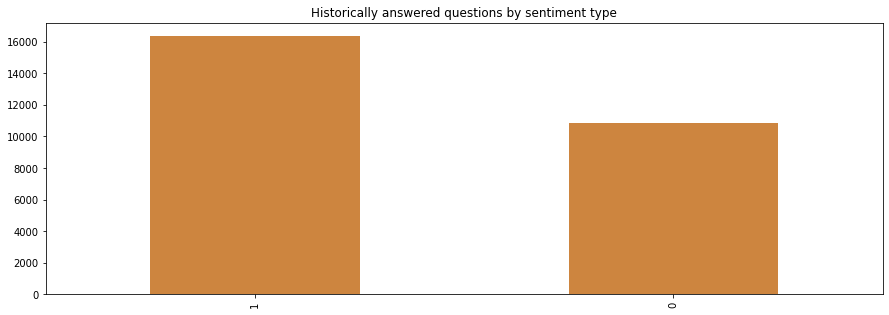

In [20]:
# Plot good vs bad answers using sentiment analysis
plt.figure(figsize=(15,5))
df_historically_answered_qs['sentiment_type'].value_counts().head(10).plot(kind="bar",color='peru')
plt.title('Historically answered questions by sentiment type')

## 5.2. Evaluate Sentiment Analysis Factor

          Classifier   Accuracy   ROC_AUC
4         Neural Net  91.942361  0.959327
5           AdaBoost  87.428319  0.919016
6            XGBoost  85.296280  0.910266
1         Linear SVM  84.972798  0.917341
2      Decision Tree  77.341567  0.795560
3      Random Forest  60.505808  0.703454
0  Nearest Neighbors  48.184091  0.573125
Best --> Classifier = Neural Net, Score (test, accuracy) = 91.94


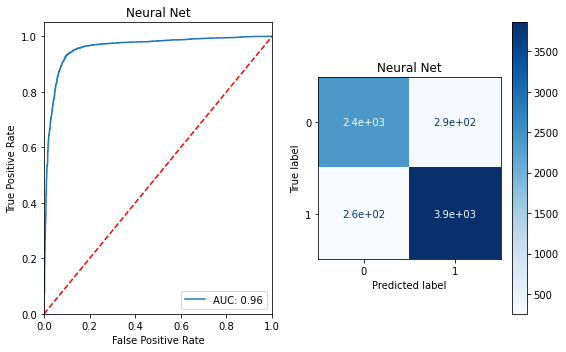

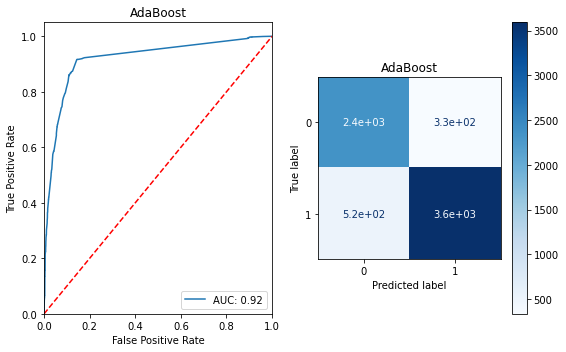

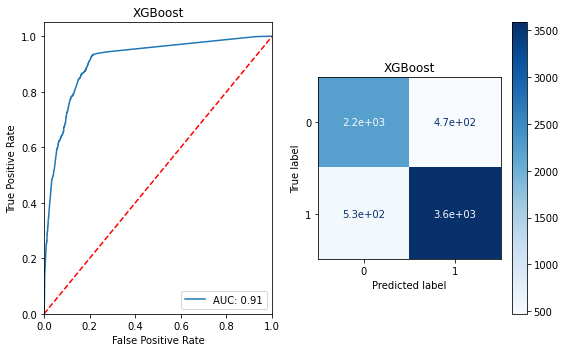

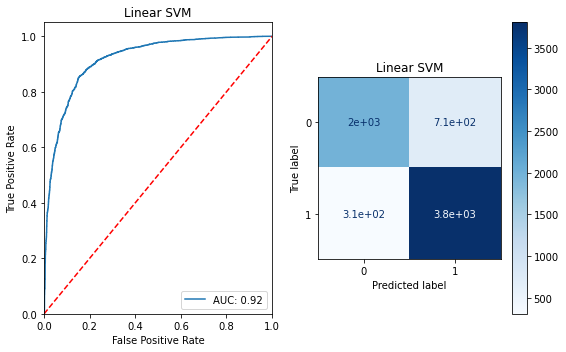

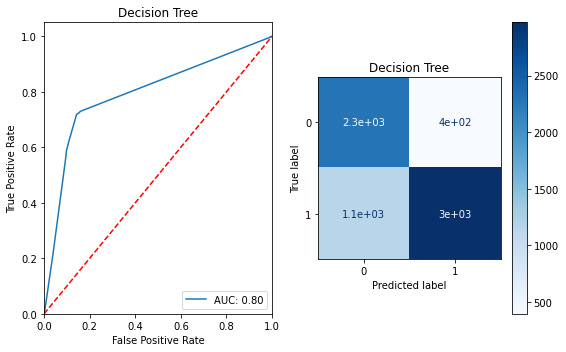

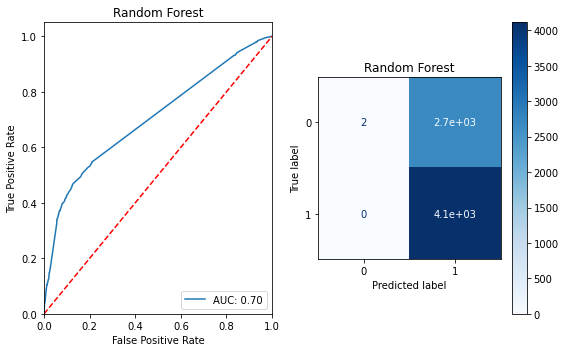

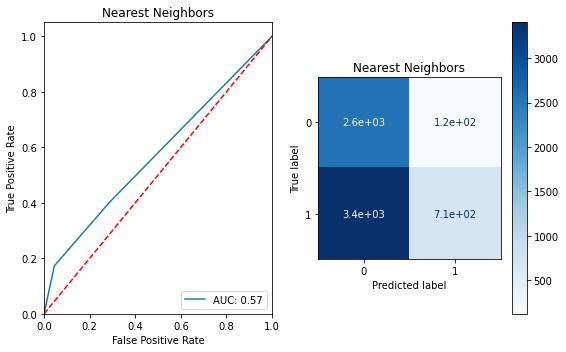

In [21]:
# Train, Validate, Test, Show results
X = df_historically_answered_qs['question_vocab']
y = df_historically_answered_qs['sentiment_type']

metrics = train_evaluate_classifiers(X, y)
show_classification_results(metrics)

## 5.3. Pickle best sentiment analysis model

In [22]:
# Pickle the best model
best_model = metrics[metrics['Classifier'] == 'Neural Net']['model'].values[0]
pickle_filepath = "/content/drive/MyDrive/Best_Sentiment_Analysis_Model_RQAR.pkl"
pickle_best_model(best_model, pickle_filepath)

## 5.4. Load, Evaluate best pickled sentiment analysis model

In [23]:
print('-- Predicting sentiments using the pickled, best classification model --')
X_classification_features = df_historically_answered_qs['question_vocab']
y_classification = df_historically_answered_qs['sentiment_type']

best_classifier = 'Neural Net'
pickle_filepath = "/content/drive/MyDrive/Best_Sentiment_Analysis_Model_RQAR.pkl"
evaluate_best_pickled_classifer(X_classification_features, y_classification, pickle_filepath, best_classifier)

-- Predicting sentiments using the pickled, best classification model --
Best Classifier score= Neural Net, Score (test, accuracy) = 94.32,  auc = 0.98, F1 = 95.36, Precision = 94.63, Recall = 96.10


# 5.0. Semantic Analysis Factor

## 5.1. Perform cosine similarity of question with historically answered questions

In [25]:
# get semantic similarity score
import spacy
nlp = spacy.load('en_core_web_sm')
def get_semantic_similarity_score(newly_posted_question, historically_answered_question):
  tvec = TfidfVectorizer(stop_words=stop_words, max_features=1000, ngram_range=(1, 3))
  doc1 = nlp(newly_posted_question)
  doc2 = nlp(historically_answered_question)
  similarity_score = doc1.similarity(doc2)
  return similarity_score

In [91]:
# for each newly posted question
# get best semantically similar historically answered question
def get_best_semantic_match_question(df_new_qs, df_historical_qs):
  for ni, nr in df_new_qs.iterrows():
    best_semantic_similarity_score = 0
    best_semantic_match_subreddits = 0
    newly_posted_question = nr['question_vocab']
    
    for hi, hr in df_historical_qs.iterrows():
      historically_answered_question = hr["question_vocab"]
      semantic_similarity_score = get_semantic_similarity_score(newly_posted_question, historically_answered_question)
      if (semantic_similarity_score > best_semantic_similarity_score):
        best_semantic_similarity_score = semantic_similarity_score
        best_semantic_match_subreddits = hr["suggested_subreddits"]
    
    df_new_qs.at[ni, 'best_semantic_match_subreddits'] = best_semantic_match_subreddits
    df_new_qs.at[ni, 'best_semantic_match_score'] = best_semantic_similarity_score

In [50]:
df_QA_val.head()

,question_vocab,comment_upvotes,suggested_subreddits,LDA_topic,LDA_topic_score
22965,peopl post small wood work project like tini w...,1,r/woodworking,24,0.213166
23714,music post arrang peopl link music sheet amate...,1,r/sheetmusic,23,0.256016
11179,peopl show funni way break rule someth logic w...,1,r/madlads,15,0.108624
26062,find specif video pictur describ,2,r/helpmefind,24,0.808000
6341,kind brag skill non physic achiev freeli ya bo...,1,r/congratslikeimfive,22,0.136932


In [51]:
# compare semantic similarity with 10 historical questions
df1 = df_historically_answered_qs.head(10)
df_newly_posted_qs = df_QA_val
df_newly_posted_qs = df_newly_posted_qs.head(30)
get_best_semantic_match_question(df_newly_posted_qs, df1)

In [52]:
# Accept the semantic similarity as a measure if semantic similarity score > 0.8
df_newly_posted_qs['semantic_type'] = df_newly_posted_qs['best_semantic_match_score'].apply(lambda x: 1 if x > 0.8 else 0)
df_newly_posted_qs

,question_vocab,comment_upvotes,suggested_subreddits,LDA_topic,LDA_topic_score,best_semantic_match_subreddits,best_semantic_match_score,semantic_type
22965,peopl post small wood work project like tini w...,1,r/woodworking,24,0.213166,r/findfashion,0.890395,1
23714,music post arrang peopl link music sheet amate...,1,r/sheetmusic,23,0.256016,r/musictheory,0.902783,1
11179,peopl show funni way break rule someth logic w...,1,r/madlads,15,0.108624,r/redditinreddit,0.888034,1
26062,find specif video pictur describ,2,r/helpmefind,24,0.808000,r/redditinreddit,0.842851,1
6341,kind brag skill non physic achiev freeli ya bo...,1,r/congratslikeimfive,22,0.136932,r/fancyfollicles,0.803180,1
24155,favor reopen societi,6,r/anarchocapitalism,18,0.010000,r/breadit,0.781435,0
28744,tell way make money internet part time hobbi l...,1,r/passive,12,0.379054,r/musictheory,0.895656,1
25040,sale post merchandis get idea sell,2,r/whatsthisworth,24,0.427023,r/talesfromthefrontdesk,0.837034,1
27412,look healthi eat one ask basic question withou...,1,r/eatcheapandhealthy,20,0.190913,r/coins,0.854770,1
22398,actual peopl struggl thought suicid suicid dea...,52,r/suicidal,22,0.489691,r/findfashion,0.748502,0


## 5.2. Evaluate Semantic Analysis

          Classifier  Accuracy   ROC_AUC
0  Nearest Neighbors      62.5  0.500000
1         Linear SVM      62.5  0.133333
2      Decision Tree      62.5  0.500000
3      Random Forest      62.5  0.600000
6            XGBoost      62.5  0.600000
4         Neural Net      37.5  0.666667
5           AdaBoost      37.5  0.466667
Best --> Classifier = Nearest Neighbors, Score (test, accuracy) = 62.50


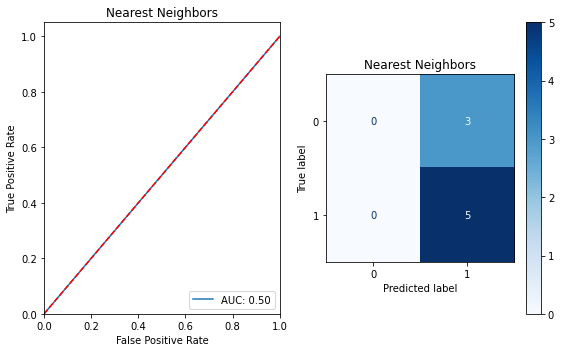

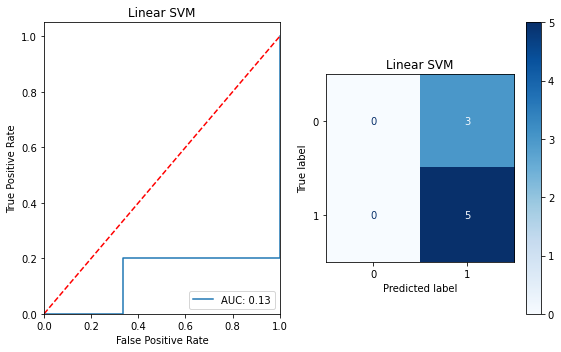

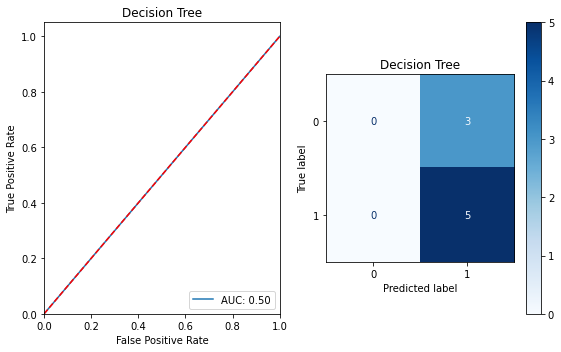

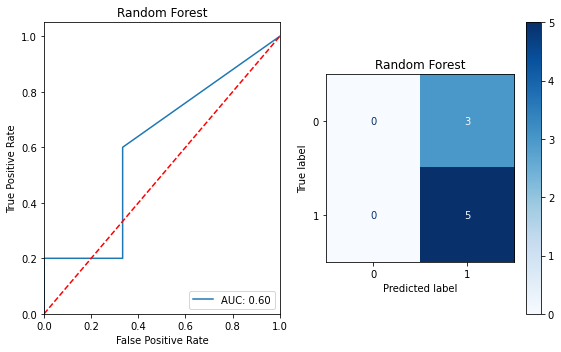

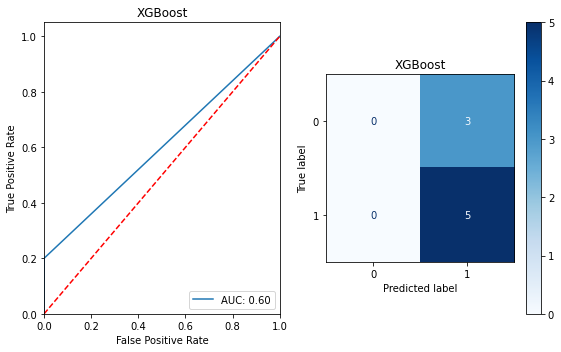

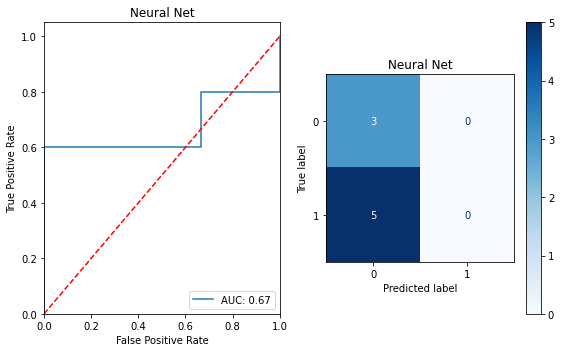

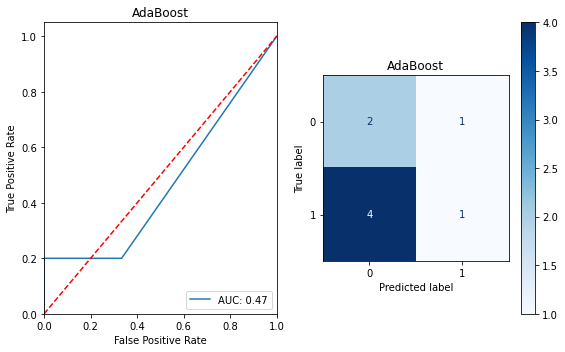

In [53]:
# Train, Validate, Test, Show results
X = df_newly_posted_qs['question_vocab']
y = df_newly_posted_qs['semantic_type']

metrics = train_evaluate_classifiers(X, y)
show_classification_results(metrics)

In [54]:
metrics.head()

,Classifier,y_pred,y_test,X_test,Accuracy,fpr,tpr,ROC_AUC,F1,Precision,Recall,model
0,Nearest Neighbors,"[1, 1, 1, 1, 1, 1, 1, 1]",27800 1 17418 0 23270 1 25538 1 22...,27800 question explos grenad gun explos saf...,62.5,"[0.0, 1.0]","[0.0, 1.0]",0.500000,76.923077,62.5,100.0,"(TfidfVectorizer(analyzer='word', binary=False..."
1,Linear SVM,"[1, 1, 1, 1, 1, 1, 1, 1]",27800 1 17418 0 23270 1 25538 1 22...,27800 question explos grenad gun explos saf...,62.5,"[0.0, 0.3333333333333333, 0.3333333333333333, ...","[0.0, 0.0, 0.2, 0.2, 1.0]",0.133333,76.923077,62.5,100.0,"(TfidfVectorizer(analyzer='word', binary=False..."
2,Decision Tree,"[1, 1, 1, 1, 1, 1, 1, 1]",27800 1 17418 0 23270 1 25538 1 22...,27800 question explos grenad gun explos saf...,62.5,"[0.0, 1.0]","[0.0, 1.0]",0.500000,76.923077,62.5,100.0,"(TfidfVectorizer(analyzer='word', binary=False..."
3,Random Forest,"[1, 1, 1, 1, 1, 1, 1, 1]",27800 1 17418 0 23270 1 25538 1 22...,27800 question explos grenad gun explos saf...,62.5,"[0.0, 0.0, 0.3333333333333333, 0.3333333333333...","[0.0, 0.2, 0.2, 0.6, 1.0]",0.600000,76.923077,62.5,100.0,"(TfidfVectorizer(analyzer='word', binary=False..."
6,XGBoost,"[1, 1, 1, 1, 1, 1, 1, 1]",27800 1 17418 0 23270 1 25538 1 22...,27800 question explos grenad gun explos saf...,62.5,"[0.0, 0.0, 1.0]","[0.0, 0.2, 1.0]",0.600000,76.923077,62.5,100.0,"(TfidfVectorizer(analyzer='word', binary=False..."


## 5.3. Pickle best Semantic Analysis model

In [55]:
# Pickle the best model
best_model = metrics[metrics['Classifier'] == 'AdaBoost']['model'].values[0]
pickle_filepath = "/content/drive/MyDrive/Best_Semantic_Analysis_Model_RQAR.pkl"
pickle_best_model(best_model, pickle_filepath)

## 5.4. Load, Evaluate best pickled semantic analysis model

In [56]:
print('-- Predicting semantic similarity using the pickled, best classification model --')
X_classification_features = df_newly_posted_qs['question_vocab']
y_classification = df_newly_posted_qs['semantic_type']

best_classifier = 'AdaBoost'
pickle_filepath = "/content/drive/MyDrive/Best_Semantic_Analysis_Model_RQAR.pkl"
evaluate_best_pickled_classifer(X_classification_features, y_classification, pickle_filepath, best_classifier)

-- Predicting semantic similarity using the pickled, best classification model --
Best Classifier score= AdaBoost, Score (test, accuracy) = 100.00,  auc = 1.00, F1 = 100.00, Precision = 100.00, Recall = 100.00


# 6.0. Make best answer recommendations

## 6.1. Get sentiment score

In [57]:
def getSentimentScore(comment):
  prob = 0
  if comment.size == 1:
    pickle_filepath = "/content/drive/MyDrive/Best_Sentiment_Analysis_Model_RQAR.pkl"
    best_sentiment_model = pickle.load(open(pickle_filepath, 'rb'))
    prob = best_sentiment_model.predict_proba(comment)[:,1]
  return float(prob)

## 6.2. Get semantic score

In [58]:
def getSemanticScore(question):
  prob = 0
  if question.size == 1:
    pickle_filepath = "/content/drive/MyDrive/Best_Semantic_Analysis_Model_RQAR.pkl"
    best_semantic_model = pickle.load(open(pickle_filepath, 'rb'))
    prob = best_semantic_model.predict_proba(question)[:,1]
  return float(prob)

## 6.4. Get confidence in best answer recommendation
Define confidence as a polynomial function of sentiment and semantic scores
### 1. Associate weights for each factor proportional to model accuracy
### 2. Prediction Score is obtained by *ensembling factors* as follows
### PS = p0*w0 + p1*w1 + p2*w2
   where   
   i.  p is predicited probability of a factor  
   ii. w is normalized factor weight, proportional to accuracy of prediction  

### Confidence is obtained from prediction score as under
0    < Prediction Score < 0.25 - low  
0.25 < Prediction Score < 0.50 - medium
0.50 < Prediction Score < 0.75 - high    
0.75 < Prediction Score < 1.00 - very high  


In [81]:
# get confidence in best answer recommendation
def get_prediction_score_reading(df_question):
    question = df_question['question_vocab']
    model_accuracy = [0.92, 0.63] 
    model_weight = [acc/sum(model_accuracy) for acc in model_accuracy]
    sum_model_weights = 0
    prediction_score = []

    # get sentiment reading
    sentiment_prob = getSentimentScore(question)
    prediction_score.append(model_weight[0] * sentiment_prob)
    sum_model_weights += model_weight[0]
    print('Sentiment score reading is %f ' %(sentiment_prob))

    # get semantic reading
    semantic_prob = getSemanticScore(question)
    prediction_score.append(model_weight[1] * semantic_prob)
    sum_model_weights += model_weight[1]
    print('Semantic score reading is %f ' %(semantic_prob))

    cummalative_prediction_score = sum(prediction_score[0:len(prediction_score)]) / sum_model_weights
    print('Cummalative prediction score in recommendation is %f ' %(cummalative_prediction_score))

    return cummalative_prediction_score

# 7.0. Automated inference pipeline

## 7.1. Read in streaming test questions

In [71]:
path = '/content/drive/Shareddrives/CMPE295-TeamEquality/RQAR Code/2. Data Cleaning/data/test_QA_pair.csv'
df_QA_test = pd.read_csv(path)
df_QA_test = df_QA_test.drop(columns=['question_id','question','comment_id'])
df_QA_test

,question_vocab,comment_upvotes,suggested_subreddits
0,post misinterpret sign label,1,r/dontdeadopeninside
1,need help find movi zombi film guy zombi lock ...,2,r/tipofmytongue
2,look post get advic question bug need give adv...,2,r/amitheasshole
3,place find 3d friend code,1,r/gaming
4,find someon chang style song look see commis s...,1,r/slavelabour
...,...,...,...
8497,discuss odd scari experi technolog specif siri...,1,r/smarthomestories
8498,help help scienc inquiri question,2,r/explainlikeimfive
8499,type angri messag will say actual person mad e...,2,r/rant
8500,hard describ crazi internet drama found one cr...,2,r/youseeingthisshit


## 7.2. Helper: Pick a random question

In [82]:
def get_random_questions(num_items):
  random_question = df_QA_test.sample(n=num_items)
  return random_question

## 7.3. Helper: Print confidence in recommendation

In [83]:
def print_confidence(prediction_score):
  if prediction_score > 0.75:
    print ("Very high confidence in best answer recommendation")
  elif prediction_score > 0.5 and prediction_score < 0.75:
    print ("High confidence in best answer recommendation")
  elif prediction_score > 0.25 and prediction_score < 0.50:
    print ("Medium confidence in best answer recommendation")
  elif prediction_score < 0.25:
    print ("Low confidence in best answer recommendation")


## 7.4. Helper: Print best answer recommendation

In [127]:
def print_best_answer_recommendation(df_newly_posted_random_question):
  print('Best subreddit recommendation is %s' % (df_newly_posted_random_question['best_semantic_match_subreddits']))

## 7.5. Run automated pipeline on 10 questions

In [128]:
def run_automated_inference_pipeline(num_items):
  question = 'question_vocab'
  df_random_qs = get_random_questions(num_items)
  get_best_semantic_match_question(df_random_qs, df1)
  i = 0
  while ( i < num_items):
    df_random_question = df_random_qs.sample(1)
    print('\nRunning [RQAR] on - %s ' % (df_random_question['question_vocab']))
    prediction_score = get_prediction_score_reading(df_random_question)
    print_confidence(prediction_score)
    print_best_answer_recommendation(df_random_question)
    i = i + 1

In [129]:
num_questions = 10
reading = run_automated_inference_pipeline(num_questions)


Running [RQAR] on - 356    want brag girlfriend someon girlfriend make po...
Name: question_vocab, dtype: object 
Sentiment score reading is 0.846974 
Semantic score reading is 0.999974 
Cummalative prediction score in recommendation is 0.909161 
Very high confidence in best answer recommendation
Best subreddit recommendation is 356    r/findfashion
Name: best_semantic_match_subreddits, dtype: object

Running [RQAR] on - 4329    applianc repair sure general hair dryer random...
Name: question_vocab, dtype: object 
Sentiment score reading is 0.997966 
Semantic score reading is 0.695443 
Cummalative prediction score in recommendation is 0.875005 
Very high confidence in best answer recommendation
Best subreddit recommendation is 4329    r/findfashion
Name: best_semantic_match_subreddits, dtype: object

Running [RQAR] on - 1670    cofe like
Name: question_vocab, dtype: object 
Sentiment score reading is 0.999756 
Semantic score reading is 0.014452 
Cummalative prediction score in recomme